In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
df = pd.read_csv(r"C:\Users\bathma\Downloads\machine learning\haert 1.csv")

In [24]:
df.head()

,RestingBP,Cholesterol,HeartDisease
0,140,289,0
1,160,180,1
2,130,283,0
3,138,214,1
4,150,195,0


<AxesSubplot:xlabel='RestingBP', ylabel='Cholesterol'>

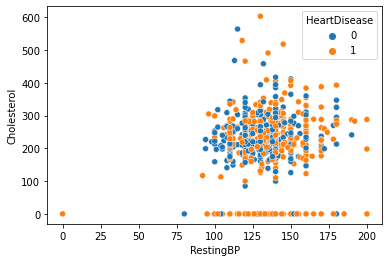

In [25]:
sns.scatterplot(data=df,x='RestingBP',y='Cholesterol',hue='HeartDisease')

(100.0, 300.0)

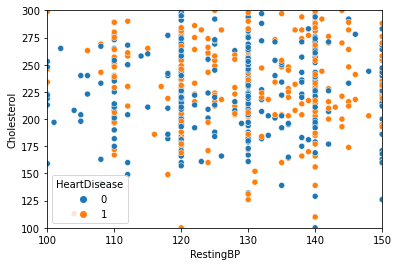

In [27]:
sns.scatterplot(data=df,x='RestingBP',y='Cholesterol',hue='HeartDisease')
plt.xlim(100,150)
plt.ylim(100,300)

In [15]:
# importing sklearn for model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [43]:
# knn classifier and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [32]:
#prediction
prediction = knn.predict(scaled_X_test)

In [44]:
# for classification report 
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
confusion_matrix(y_test,prediction)

array([[ 60,  52],
       [ 63, 101]], dtype=int64)

In [46]:
len(y_test)

276

In [47]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.49      0.54      0.51       112
           1       0.66      0.62      0.64       164

    accuracy                           0.58       276
   macro avg       0.57      0.58      0.57       276
weighted avg       0.59      0.58      0.59       276



In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,prediction)

0.5833333333333334

In [50]:
#error
t=1-accuracy_score(y_test,prediction)

In [52]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    t=1-accuracy_score(y_test,pred_i)
    error_rate.append(t)

Text(0, 0.5, 'Error Rate')

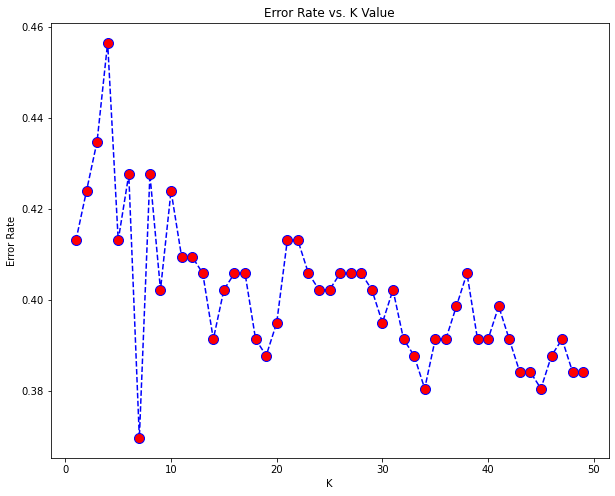

In [56]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')